# importing packages

In [1]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import sys, os

import numpy # threshold=sys.maxsize
numpy.set_printoptions(threshold=100)

#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

#3d plots on base map
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.animation as animation

# Getting Data

In [2]:
geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20210628.030.nc4")
lat = geography_file.variables['lat'][:]
lon = geography_file.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
time = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

In [3]:
# shape is (1, 224, 464)
ori_shape = gws_inst.shape
# turns it into an 1D array
flatten = gws_inst.data[0].flatten()
# get indexes to the values from the range; 80 < x < 95; get values `above zero`
above_zero = np.where((flatten>80) & (flatten<95))
# all actually values from 80 < 95
gws_1d = flatten[above_zero]
x = np.ravel(lon)[above_zero]
y = np.ravel(lat)[above_zero]
#gws_2d = gws_1d[above_zero].reshape(ori_)

# (1, 224, 464)
o = open("o.txt", "w"); text = ori_shape; print(text, file=o); o.close();
# raw data; contains missing values = -999; data[0] & not data b/c we are dealing w/ 3D & just need the 2D
g = open("g.txt", "w"); text = gws_inst.data[0]; print(text, file=g); g.close();
# raw data to 1d
f = open("f.txt", "w"); text = flatten; print(text, file=f); f.close();
# get indexes to the values from the range; 80 < x < 95; get values `above zero`
z = open("z.txt", "w"); text = above_zero; print(text, file=z); z.close();
# all actually values from 80 < 95
d = open("d.txt", "w"); text = gws_1d; print(text, file=d); d.close();
# lon and lat values; ex. Maryland is Longitude: -76.641273, Latitude: 39.045753
xf = open("xf.txt", "w"); text = x; print(text, file=xf); xf.close();
yf = open("yf.txt", "w"); text = y; print(text, file=yf); yf.close();

flatten_sort = np.sort(flatten);
s = open("s.txt", "w"); text = flatten_sort; print(text, file=s); s.close();

In [4]:
gws_zero_out = np.where(gws_inst.data[0]<0, 0, gws_inst.data[0])

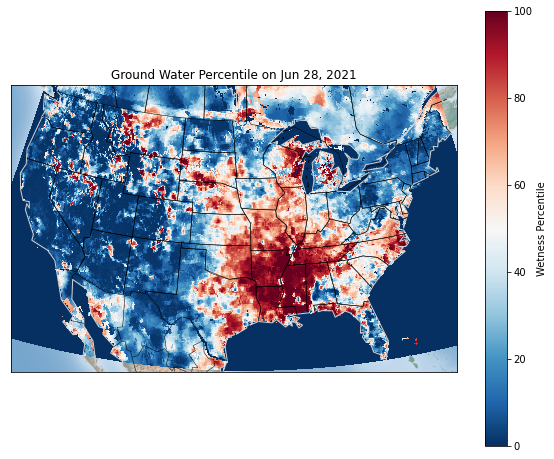

In [5]:
fig = plt.figure(figsize=(10, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.shadedrelief(scale=0.5)

#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, gws_zero_out, latlon=True, cmap='RdBu_r')
#plt.clim(-8, 8)
map.drawcoastlines(color='lightgray')
map.drawstates()
map.drawcountries()
plt.title('Ground Water Percentile on Jun 28, 2021')
plt.colorbar(label='Wetness Percentile')

[80.422844 80.764465 81.18388  ... 85.868225 82.71467  81.53888 ]
[0. 0. 0. ... 0. 0. 0.]
1


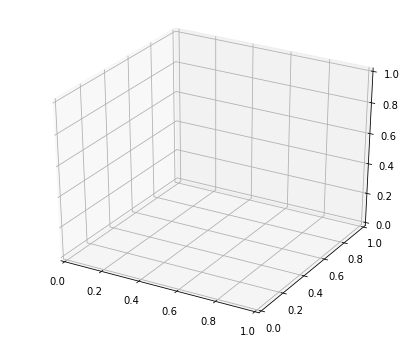

In [14]:
# setup the figure and axes
fig = plt.figure(figsize=(16, 6))
#ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,fix_aspect=False)

#fig = plt.figure()
#ax = Axes3D(fig)

#this draw the 3D plot
ax = fig.add_subplot(121, projection='3d')

#_x = np.arange(4)
#_y = np.arange(5)
#_xx, _yy = np.meshgrid(_x, _y)
#x, y = _xx.ravel(), _yy.ravel()


#top = x + y
top = gws_1d
bottom = np.zeros_like(top)
width = depth = 1
print(top)
print(bottom)
print(width)